# Plot pps and Bps of daily DNS resolution

In [2]:
import pandas as pd 
import datetime
from datetime import timedelta
import time
import glob
import subprocess
import os, sys
import numpy as np
import lzma
import matplotlib
matplotlib.use("TkAgg")
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
print("Pandas", pd.__version__)
print("numpy", np.__version__)
print("python", sys.version)
print("matplotlib", matplotlib.__version__)

Pandas 0.23.0
numpy 1.14.4
python 3.6.5 (default, Mar 30 2018, 06:42:10) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
matplotlib 2.2.2


In [3]:
!pwd
# scp pl21:/root/ppslog/1529081063_20180615_1844.log .
# grep -F "Sat Jun 16"   1529081063_20180615_1844.log  > jun16.log

/Users/scheitle/promotion/git/dnsres_analysis


In [22]:
FN="jun16.log.xz"
statsl = []
with lzma.open(FN, "r") as F:
    for line in F:
        stats = {}
        #print(line)
        ls = line.split( )
        #print(ls)
        stats["ts"] = ls[0]
        # datetime.datetime.utcfromtimestamp(1284286794)
        stats["ts"] = datetime.datetime.utcfromtimestamp(int(ls[0]))
        stats["TX [kpps]"] = int(ls[9])/1024 # convert to kpps
        stats["TX [Mbps]"] = 8*int(ls[11])/(1024*1024) # convert to megabit per second
        stats["RX [kpps]"] = int(ls[15])/1024
        stats["RX [Mbps]"] = 8*int(ls[17])/(1024*1024) 
        # print(ts,txpps, txbps, rxpps, rxbps)
        #print(stats)
        statsl.append(stats)

In [23]:
df = pd.DataFrame.from_records(statsl, index='ts')

As the resulting plots are super-large (86400*2 data points), we first plot them raw but then create sampled versions for further use.

In [25]:
import pytz
CEST = pytz.timezone('Europe/Berlin')
df.index = df.index.tz_localize(pytz.utc).tz_convert(CEST)

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `kpps-crop.pdf'.
/Users/scheitle/promotion/git/dnsres_analysis/kpps-crop.pdf


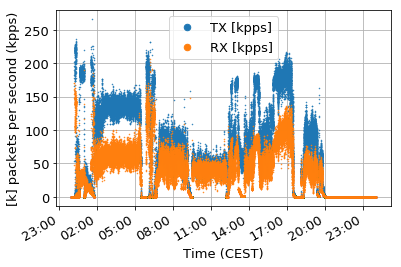

In [26]:
plt.rcParams.update({'font.size': 13})
# ax = plt.figure()
ax = df[["TX [kpps]", "RX [kpps]"]].plot(kind="line", marker=".", linewidth=0, markersize=1, legend=True, subplots=False)
ax.legend(markerscale=13)  
ax.set(xlabel='Time (CEST)', ylabel='[k] packets per second (kpps)')
ax.legend(markerscale=13) # , loc="upper right") 
ax.set_xticklabels(["23:00", "02:00", "05:00", "08:00", "11:00", "14:00", "17:00", "20:00", "23:00"]) #, "11M", "13M", "15M"])
plt.grid()
#fig = ax.get_figure()
#fig.savefig('kpps.pdf', format="pdf", dpi=2000, bbox_inches='tight')
#!pdfcrop kpps.pdf
#!rm kpps.pdf#
#!readlink -f kpps-crop.pdf
#!open kpps-crop.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `mbits-crop.pdf'.
/Users/scheitle/promotion/git/dnsres_analysis/mbits-crop.pdf


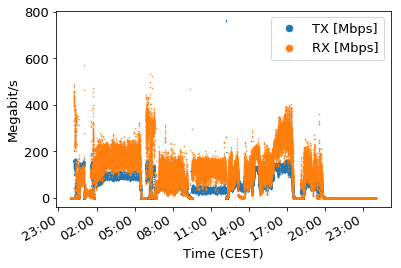

In [27]:
ax = df[["TX [Mbps]", "RX [Mbps]"]].plot(kind="line", marker=".", linewidth=0, markersize=1)
ax.legend(markerscale=13)  
ax.set(xlabel='Time (CEST)', ylabel='Megabit/s')
ax.legend(markerscale=13) # , loc="upper right") 
ax.set_xticklabels(["23:00", "02:00", "05:00", "08:00", "11:00", "14:00", "17:00", "20:00", "23:00"]) #, "11M", "13M", "15M"])
#plt.grid()
#fig = ax.get_figure()
#fig.savefig('mbits.pdf', format="pdf", dpi=2000, bbox_inches='tight')
#!pdfcrop mbits.pdf
#!rm mbits.pdf
#!readlink -f mbits-crop.pdf
#!open mbits-crop.pdf

In [20]:
df.iloc[60000]

RX [Mbps]    282.060486
RX [kpps]    101.190918
TX [Mbps]    138.787041
TX [kpps]    185.657227
Name: 2018-06-16 16:40:00+02:00, dtype: float64

In [28]:
(df.iloc[60000]["RX [Mbps]"]*1024*1024/8)/(1000*df.iloc[60000]["RX [kpps]"]) ## 393 Bytes per packet, reasonable size

393.86226609993093

In [33]:
df = df.resample('10s').max()  # max creates a plot that looks closest to the original

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `kpps-resampled-crop.pdf'.
/Users/scheitle/promotion/git/dnsres_analysis/kpps-resampled-crop.pdf


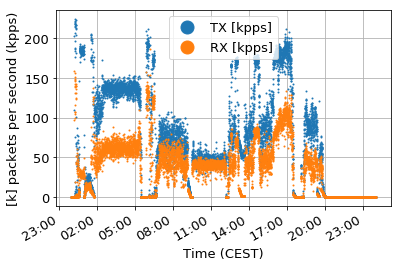

In [34]:
plt.rcParams.update({'font.size': 13})
# ax = plt.figure()
ax = df[["TX [kpps]", "RX [kpps]"]].plot(kind="line", marker=".", linewidth=0, markersize=2, legend=True, subplots=False)
ax.legend(markerscale=13)  
ax.set(xlabel='Time (CEST)', ylabel='[k] packets per second (kpps)')
ax.legend(markerscale=13) # , loc="upper right") 
ax.set_xticklabels(["23:00", "02:00", "05:00", "08:00", "11:00", "14:00", "17:00", "20:00", "23:00"]) #, "11M", "13M", "15M"])
plt.grid()
fig = ax.get_figure()
fig.savefig('kpps-resampled.pdf', format="pdf", dpi=2000, bbox_inches='tight')
!pdfcrop kpps-resampled.pdf
!rm kpps-resampled.pdf
!readlink -f kpps-resampled-crop.pdf
!open kpps-resampled-crop.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `mbits-resampled-crop.pdf'.
/Users/scheitle/promotion/git/dnsres_analysis/mbits-resampled-crop.pdf


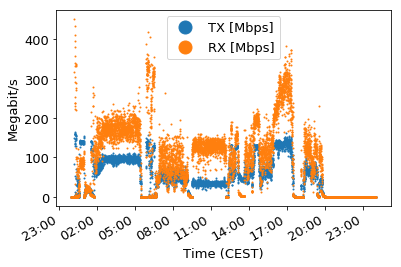

In [35]:
ax = df[["TX [Mbps]", "RX [Mbps]"]].plot(kind="line", marker=".", linewidth=0, markersize=2)
ax.legend(markerscale=13)  
ax.set(xlabel='Time (CEST)', ylabel='Megabit/s')
ax.legend(markerscale=13) # , loc="upper right") 
ax.set_xticklabels(["23:00", "02:00", "05:00", "08:00", "11:00", "14:00", "17:00", "20:00", "23:00"]) #, "11M", "13M", "15M"])
#plt.grid()
fig = ax.get_figure()
fig.savefig('mbits-resampled.pdf', format="pdf", dpi=2000, bbox_inches='tight')
!pdfcrop mbits-resampled.pdf
!rm mbits-resampled.pdf
!readlink -f mbits-resampled-crop.pdf
!open mbits-resampled-crop.pdf